### Projeto: Prophet vs. ARIMA
Comparação de uma série temporal simulada com alta sazonalidade com modelos Prophet e ARIMA.

https://colab.research.google.com/drive/1DXNiukEIeaV4EF993ddqNLQC_fnOtyDd#scrollTo=DMGUG2agJSym

In [1]:
!python -m pip install prophet
!pip install pystan==2.19.1.1

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pystan
Failed to build pystan


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [4 lines of output]
      C:\Users\User\AppData\Local\Temp\pip-install-qz1qms6y\pystan_903ee9d918554fd08a49a3a7929be701\setup.py:61: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
        self.version = node.value.s
      Cython>=0.22 and NumPy are required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# ======================
# 1. Criar série simulada
# ======================
np.random.seed(42)
periods = 365 * 3
dates = pd.date_range(start="2020-01-01", periods=periods, freq='D')
trend = np.linspace(50, 100, periods)
seasonality = 10 * np.sin(2 * np.pi * dates.dayofyear / 365.25)
noise = np.random.normal(0, 2, periods)
values = trend + seasonality + noise

In [4]:
# DataFrame para Prophet
df_prophet = pd.DataFrame({'ds': dates, 'y': values})

In [5]:
df_prophet.head()

,ds,y
0,2020-01-01,51.165444
1,2020-01-02,50.113156
2,2020-01-03,51.902628
3,2020-01-04,53.870725
4,2020-01-05,50.573570


In [6]:
# DataFrame para ARIMA
df_arima = pd.DataFrame({'y': values}, index=dates)

In [7]:
df_arima.head()

,y
2020-01-01,51.165444
2020-01-02,50.113156
2020-01-03,51.902628
2020-01-04,53.870725
2020-01-05,50.573570


In [8]:
# ======================
# 2. Modelo Prophet
# ======================
model_prophet = Prophet(yearly_seasonality=True)
model_prophet.fit(df_prophet)
future_prophet = model_prophet.make_future_dataframe(periods=180)
forecast_prophet = model_prophet.predict(future_prophet)

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [9]:
# ======================
# 3. Modelo ARIMA
# ======================
# Ajustar ARIMA(2,1,2) só para exemplo
model_arima = ARIMA(df_arima['y'], order=(2,1,2))
results_arima = model_arima.fit()

In [10]:
# Fazer forecast para 180 dias
forecast_arima = results_arima.get_forecast(steps=180)
arima_pred = forecast_arima.predicted_mean
arima_ci = forecast_arima.conf_int()

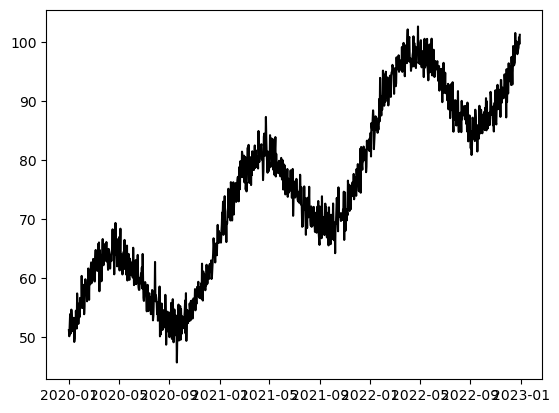

In [11]:
# Observado
plt.plot(df_arima.index, df_arima['y'], label='Observado', color='black')

In [ ]:
# Prophet
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet', color='blue')

In [ ]:
# ARIMA
plt.plot(arima_pred.index, arima_pred, label='ARIMA', color='red')
plt.fill_between(arima_ci.index, arima_ci.iloc[:,0], arima_ci.iloc[:,1], color='red', alpha=0.2)

In [ ]:
# ======================
# 4. Plot comparativo
# ======================
plt.figure(figsize=(14,6))

# Observado
plt.plot(df_arima.index, df_arima['y'], label='Observado', color='black')

# Prophet
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prophet', color='blue')

# ARIMA
plt.plot(arima_pred.index, arima_pred, label='ARIMA', color='red')
plt.fill_between(arima_ci.index, arima_ci.iloc[:,0], arima_ci.iloc[:,1], color='red', alpha=0.2)

plt.title("Comparação Forecast: Prophet vs ARIMA")
plt.legend()
plt.grid(True)
plt.show()